# **Figure 2.** CPDD
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 3/31/2022|

## CPDD

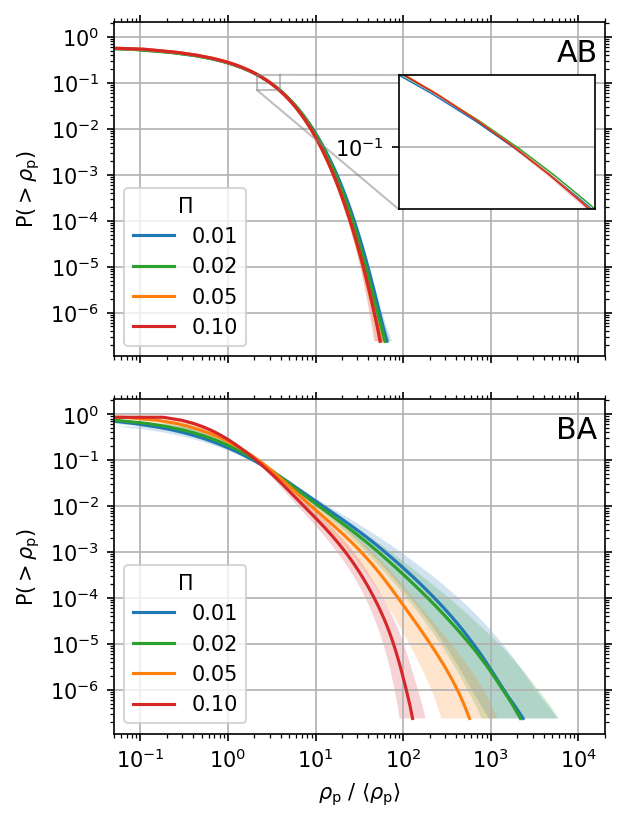

In [73]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Main subplots
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(4, 5.33), dpi=150)
fig.tight_layout()
axins = axs[0].inset_axes([0.58, 0.44, 0.40, 0.40]) # AB Zoom region inset
pwd = '../unstrat/'
runs = ['AB', 'BA']
Pis = [['0.01', 'tab:blue'], ['0.02', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.10', 'tab:red']]
res = '2048'
xlim = (5e-2, 2e4)
indices = -np.unique(np.logspace(np.log2(int(res)**2), 0, num=100,
                     base=2, dtype=int))
arrays, max_rhops, std_max_rhops = [[], []], [], []

for i,ax in enumerate(axs):
    for Pi in Pis:
        with np.load(pwd+'%s/%s/%s/output/cpdd.npz'\
                     %(runs[i], Pi[0], res)) as data:
            cdf = np.flip(np.take_along_axis(data['cdf'], indices, 0))
            avgs = np.flip(np.take_along_axis(data['avgs'], indices, 0))
            stds = np.flip(np.take_along_axis(data['stds'], indices, 0))
            
            arrays[0].append(runs[i])
            arrays[1].append(Pi[0])
            max_rhops.append(avgs[-1])
            std_max_rhops.append(stds[-1])
            ax.loglog(avgs, cdf, color=Pi[1], label=Pi[0])
            ax.fill_betweenx(cdf, avgs/stds, avgs*stds, color=Pi[1],
                             ec=None, alpha=0.2)
            if i==0:
                axins.loglog(avgs, cdf, color=Pi[1], lw=0.7)
                axins.fill_betweenx(cdf, avgs/stds, avgs*stds, color=Pi[1],
                             ec=None, alpha=0.2)

    ax.grid()
    ax.legend(loc='lower left', title=r'$\Pi$')
    ax.minorticks_on()
    ax.set(xlim=xlim, ylabel=r'P$(>\rho_\mathrm{p})$')
    ax.text(0.98, 0.95, runs[i], ha='right', va='top', size='x-large',
                transform=ax.transAxes)
    ax.tick_params(which='both', top=True, right=True)

# AB zoom region inset
axins.grid()
axins.minorticks_off()
axins.set(xlim=(2.14, 3.9), ylim=(0.07, 0.15))
axs[0].indicate_inset_zoom(axins)

# Table 2 values
tuples = list(zip(*arrays))
names = ['Case', '$\Pi$']
index = pd.MultiIndex.from_tuples(tuples, names=names)
df = pd.DataFrame({r'$\overline{\rho_\textrm{p,max}}$'          : max_rhops,
                   r'$\sigma_{\overline{\rho_\textrm{p,max}}}$' : std_max_rhops},
                  index=index)
s = df.style.format({r'$\overline{\rho_\textrm{p,max}}$'          : '{:.1f}',
                     r'$\sigma_{\overline{\rho_\textrm{p,max}}}$' : '{:.1f}'})

# Save figure and plot
ax.set(xlabel=r'$\rho_\mathrm{p}$ / $\langle \rho_\mathrm{p} \rangle$')
plt.savefig('figs/cpdd.pdf', bbox_inches='tight', pad_inches=0.01)
plt.savefig('figs/cpdd.png', dpi=300, bbox_inches='tight', pad_inches=0.01)
s.to_latex(buf='tabs/cpdd.txt')

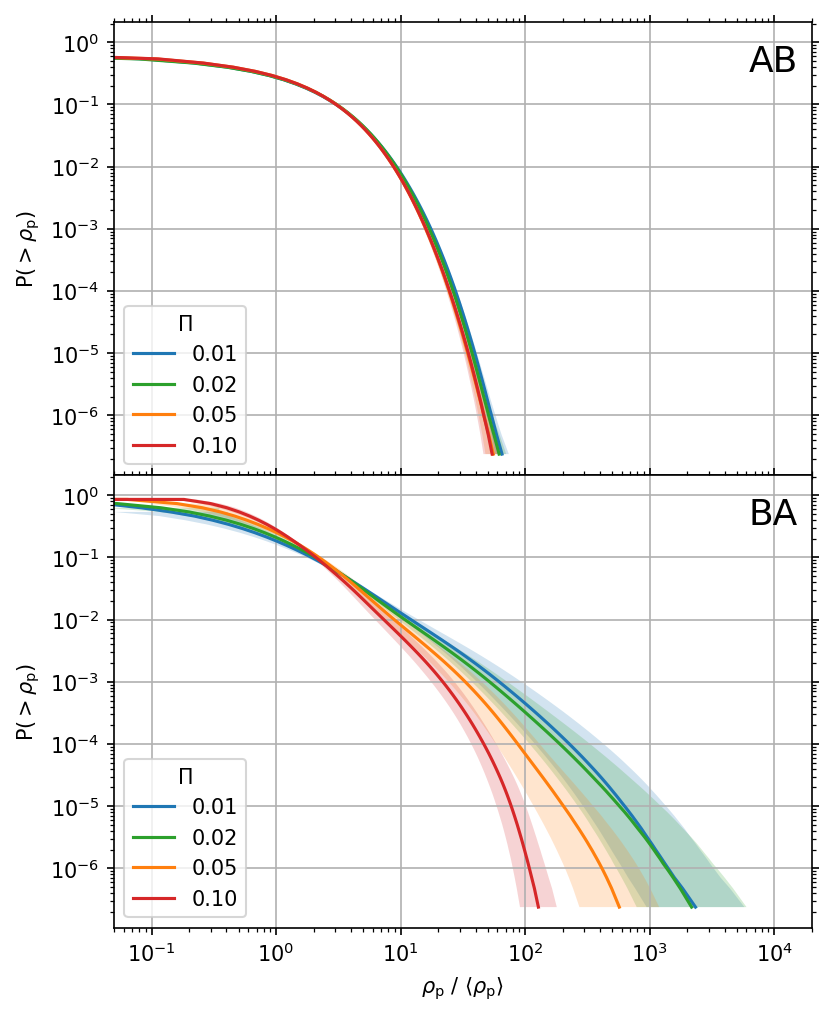

In [2]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Main subplots
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(6,8), dpi=150)
pwd = '../unstrat/'
runs = ['AB', 'BA']
Pis = [['0.01', 'tab:blue'], ['0.02', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.10', 'tab:red']]
res = '2048'
xlim = (5e-2, 2e4)
indices = -np.unique(np.logspace(np.log2(int(res)**2), 0, num=100,
                     base=2, dtype=int))
arrays, max_rhops, std_max_rhops = [[], []], [], []

for i,ax in enumerate(axs):
    # ax.axhline(0.1, c='k', ls='--')
    for Pi in Pis:
        with np.load(pwd+'%s/%s/%s/output/cpdd.npz'\
                     %(runs[i], Pi[0], res)) as data:
            cdf = np.flip(np.take_along_axis(data['cdf'], indices, 0))
            avgs = np.flip(np.take_along_axis(data['avgs'], indices, 0))
            stds = np.flip(np.take_along_axis(data['stds'], indices, 0))
            
            arrays[0].append(runs[i])
            arrays[1].append(Pi[0])
            max_rhops.append(avgs[-1])
            std_max_rhops.append(stds[-1])
            ax.loglog(avgs, cdf, color=Pi[1], label=Pi[0])
            ax.fill_betweenx(cdf, avgs/stds, avgs*stds, color=Pi[1],
                             ec=None, alpha=0.2)

    ax.grid()
    ax.legend(loc='lower left', title=r'$\Pi$')
    ax.minorticks_on()
    ax.set(xlim=xlim, ylabel=r'P$(>\rho_\mathrm{p})$')
    ax.text(0.98, 0.95, runs[i], ha='right', va='top', size='xx-large',
                transform=ax.transAxes)
    ax.tick_params(which='both', top=True, right=True)

# Table 2 output via Pandas
tuples = list(zip(*arrays))
names = ['Case', '$\Pi$']
index = pd.MultiIndex.from_tuples(tuples, names=names)
df = pd.DataFrame({r'$\overline{\rho_\textrm{p,max}}$'          : max_rhops,
                   r'$\sigma_{\overline{\rho_\textrm{p,max}}}$' : std_max_rhops},
                  index=index)
s = df.style.format({r'$\overline{\rho_\textrm{p,max}}$'          : '{:.1f}',
                     r'$\sigma_{\overline{\rho_\textrm{p,max}}}$' : '{:.1f}'})

ax.set(xlabel=r'$\rho_\mathrm{p}$ / $\langle \rho_\mathrm{p} \rangle$')
plt.subplots_adjust(hspace=0)
plt.savefig('figs/cpdd.pdf', bbox_inches='tight', pad_inches=0.01)
plt.savefig('figs/cpdd.png', dpi=300, bbox_inches='tight', pad_inches=0.01)
s.to_latex(buf='tabs/cpdd.txt')